## 실습 #1 - Classification of dog breeds (분류)
1.  다음은 개의 종류와 그 크기 데이터이다. 이 데이터를 바탕으로 k-NN 알고리즘을 적용해 보자.

In [2]:
# KNN 알고리즘
import matplotlib.pyplot as plt
import numpy as np

# 닥스훈트의 길이와 높이 데이터
dach_length = [75, 77, 83, 81, 73, 99, 72, 83]
dach_height = [24, 29, 19, 32, 21, 22, 19, 34]

# 사모예드의 길이와 높이 데이터
samo_length = [76, 78, 82, 88, 76, 83, 81, 89]
samo_height = [55, 58, 53, 54, 61, 52, 57, 64]

# 말티즈의 길이와 높이 데이터
malti_length = [35, 39, 38, 41, 30, 57, 41, 35]
malti_height = [23, 26, 19, 30, 21, 24, 28, 20]

# 새로운 데이터
new_length = [79]
new_height = [35]

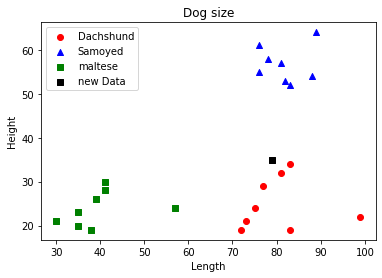

In [3]:
# 산점도로 먼저 관찰하기
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(malti_length, malti_height, c='green', marker='s', label='maltese')
plt.scatter(new_length, new_height, c='black', marker='s', label='new Data')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

plt.show()

In [20]:
# 2차원 리스트로 묶기 ( 열 쌓기 ) - np.column_stack()
d_data = np.column_stack((dach_length, dach_height))
d_label = [0]*(len(d_data))     # 닥스훈트는 0으로 레이블링

s_data = np.column_stack((samo_length,samo_height))
s_label = [1]*(len(s_data))     # 사모예드는 1

m_data = np.column_stack((malti_length, malti_height))
m_label = [2]*(len(m_data))     # 말티즈는 2

# 모든 데이터를 연결해 하나의 배열로 테이블로 만들기 - concatenate()
dogs = np.concatenate((d_data, s_data, m_data))
labels = np.concatenate((d_label, s_label, m_label))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=5

# kNN 모델 객체 생성
knn = KNeighborsClassifier(n_neighbors = k)

# 학습
knn.fit(dogs,labels)

pred = knn.predict(dogs)

# 혼동행렬 만들기
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels, pred))

In [27]:
# 클래스 지정
def classifier_result(data):
    dog_classes = {0:'닥스훈트', 1:'사모예드', 2:'말티즈'}
    for k in [3,5,7]:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(dogs,labels)
        pred = knn.predict(data) # 결과 저장
        print(data, 'k=', k, '일때', pred[0], dog_classes[pred[0]])
        
new_list = [[[58,30]], [[80,26]],[[80,41]] ,[[75,55]]]
for i in new_list:
    classifier_result(i)
    print('-------')

[[58, 30]] k= 3 일때 2 말티즈
[[58, 30]] k= 5 일때 2 말티즈
[[58, 30]] k= 7 일때 0 닥스훈트
-------
[[80, 26]] k= 3 일때 0 닥스훈트
[[80, 26]] k= 5 일때 0 닥스훈트
[[80, 26]] k= 7 일때 0 닥스훈트
-------
[[80, 41]] k= 3 일때 0 닥스훈트
[[80, 41]] k= 5 일때 0 닥스훈트
[[80, 41]] k= 7 일때 1 사모예드
-------
[[75, 55]] k= 3 일때 1 사모예드
[[75, 55]] k= 5 일때 1 사모예드
[[75, 55]] k= 7 일때 1 사모예드
-------


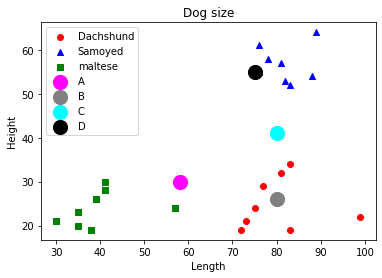

In [29]:
# 새로운 데이터 분포확인
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(malti_length, malti_height, c='green', marker='s', label='maltese')


plt.scatter(new_list[0][0][0], new_list[0][0][1], s=200, c='magenta', label='A')
plt.scatter(new_list[1][0][0], new_list[1][0][1], s=200, c='gray', label='B')
plt.scatter(new_list[2][0][0], new_list[2][0][1], s=200, c='cyan', label='C')
plt.scatter(new_list[3][0][0], new_list[3][0][1], s=200, c='black', label='D')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

plt.show()